Environment & Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

Synthetic Dataset Generation

In [2]:
np.random.seed(42)


n = 1000


data = pd.DataFrame({
'tenure_months': np.random.randint(1, 25, n),
'usage_frequency': np.random.poisson(lam=8, size=n),
'payment_method': np.random.choice(['UPI', 'Card', 'Wallet', 'COD'], n, p=[0.45, 0.25, 0.2, 0.1]),
'complaints': np.random.poisson(lam=0.8, size=n),
'discount_used_pct': np.random.randint(0, 61, n),
'plan_type': np.random.choice(['Free', 'Basic', 'Premium'], n, p=[0.4, 0.4, 0.2]),
'monthly_charges': np.random.choice([99, 199, 299], n, p=[0.4, 0.4, 0.2])
})


# Churn probability logic
churn_prob = (
0.4 * (data['tenure_months'] < 6) +
0.3 * (data['usage_frequency'] < 5) +
0.5 * (data['complaints'] > 2) +
0.3 * (data['discount_used_pct'] > 40)
)


churn_prob = np.clip(churn_prob, 0, 1)


data['churn'] = np.random.binomial(1, churn_prob)

Data Encoding

In [3]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in ['payment_method', 'plan_type']:
    data[col] = encoder.fit_transform(data[col])


Train-Test Split

In [4]:
X = data.drop('churn', axis=1)
y = data['churn']


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42, stratify=y
)

Logistic Regression (Explainable Baseline)

In [5]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


log_preds = log_model.predict(X_test)
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       222
           1       0.53      0.35      0.42        78

    accuracy                           0.75       300
   macro avg       0.66      0.62      0.63       300
weighted avg       0.73      0.75      0.73       300



Decision Tree (Rule-Based Insight)

In [6]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)


tree_preds = tree_model.predict(X_test)
print(classification_report(y_test, tree_preds))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       222
           1       0.65      0.47      0.55        78

    accuracy                           0.80       300
   macro avg       0.74      0.69      0.71       300
weighted avg       0.78      0.80      0.79       300



EXPLORATORY VISUALIZATIONS

Churn vs Tenure

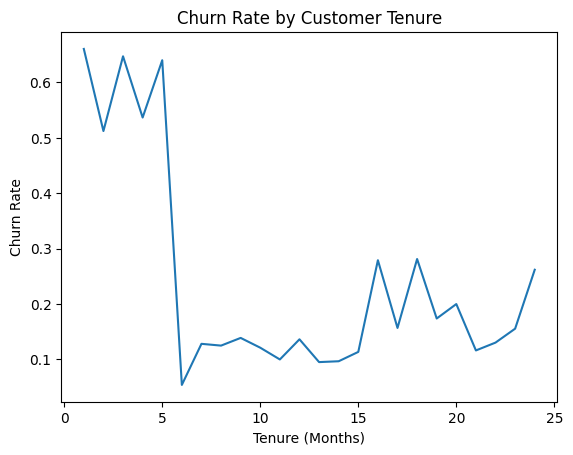

In [7]:
plt.figure()
data.groupby('tenure_months')['churn'].mean().plot()
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Tenure')
plt.show()

Churn vs Usage Frequency

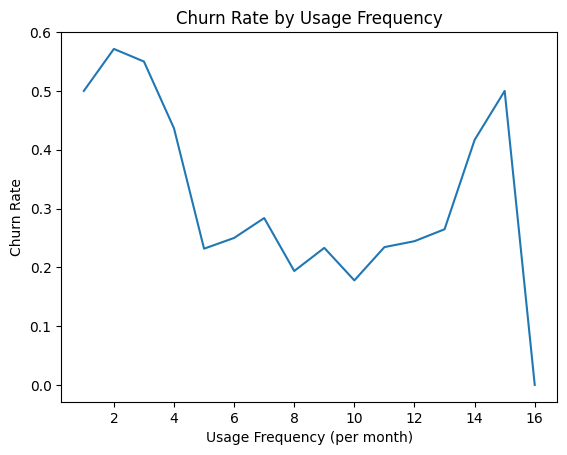

In [8]:
plt.figure()
data.groupby('usage_frequency')['churn'].mean().plot()
plt.xlabel('Usage Frequency (per month)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Usage Frequency')
plt.show()

Complaints and Churn

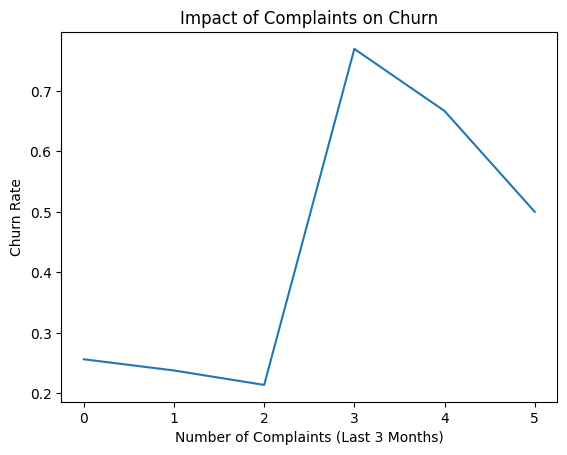

In [9]:
plt.figure()
data.groupby('complaints')['churn'].mean().plot()
plt.xlabel('Number of Complaints (Last 3 Months)')
plt.ylabel('Churn Rate')
plt.title('Impact of Complaints on Churn')
plt.show()

Discounts and Churn

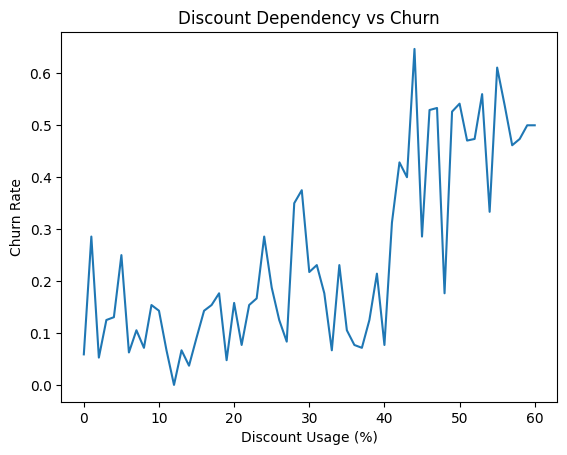

In [10]:
plt.figure()
data.groupby('discount_used_pct')['churn'].mean().plot()
plt.xlabel('Discount Usage (%)')
plt.ylabel('Churn Rate')
plt.title('Discount Dependency vs Churn')
plt.show()

Logistic Regression

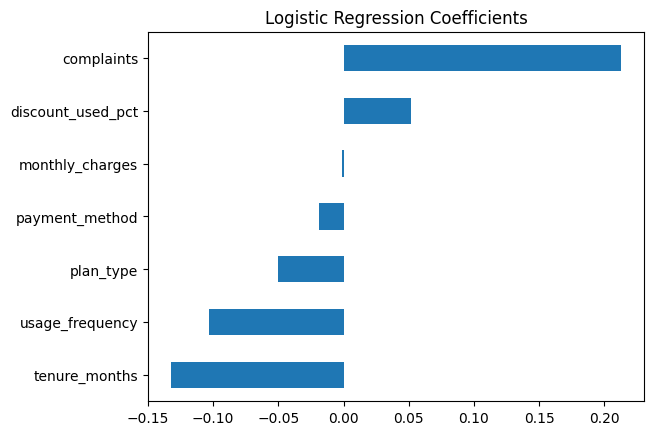

In [11]:
coefficients = pd.Series(log_model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh')
plt.title('Logistic Regression Coefficients')
plt.show()

In [12]:
import os
import pandas as pd

# 1. Confirm where you are
print("Current working directory:")
print(os.getcwd())

# 2. Define project-relative path
save_dir = "customer-churn-decision-analysis/data"
os.makedirs(save_dir, exist_ok=True)

# 3. Save the CSV
file_path = os.path.join(save_dir, "synthetic_customer_churn.csv")
data.to_csv(file_path, index=False)

# 4. Verify immediately
print("File saved at:")
print(os.path.abspath(file_path))

print("Files in data directory:")
print(os.listdir(save_dir))


Current working directory:
C:\Users\abish\case study\customer-churn-decision-analysis
File saved at:
C:\Users\abish\case study\customer-churn-decision-analysis\customer-churn-decision-analysis\data\synthetic_customer_churn.csv
Files in data directory:
['.ipynb_checkpoints', 'synthetic_customer_churn.csv']
